In [2]:
#Imports and setup
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from visuallearn.autovisualizer import auto_visualize
import IPython
from IPython.display import clear_output, display
import time
import torch.nn.functional as F
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#Create dataset using dummy make moons dataset
X, y = make_moons(noise=0.3, random_state=42)
X = StandardScaler().fit_transform(X)
input_tensor = torch.tensor(X, dtype=torch.float32)

In [5]:
#Defining models to visualize

# MLP
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 2)
        )
    def forward(self, x):
        return self.layers(x)

# CNN
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(4, 2, kernel_size=3, padding=1)
        )
    def forward(self, x):
        return self.conv(x)

# Format for CNN (batch, channels, height, width)
cnn_input = torch.randn(1, 1, 28, 28)

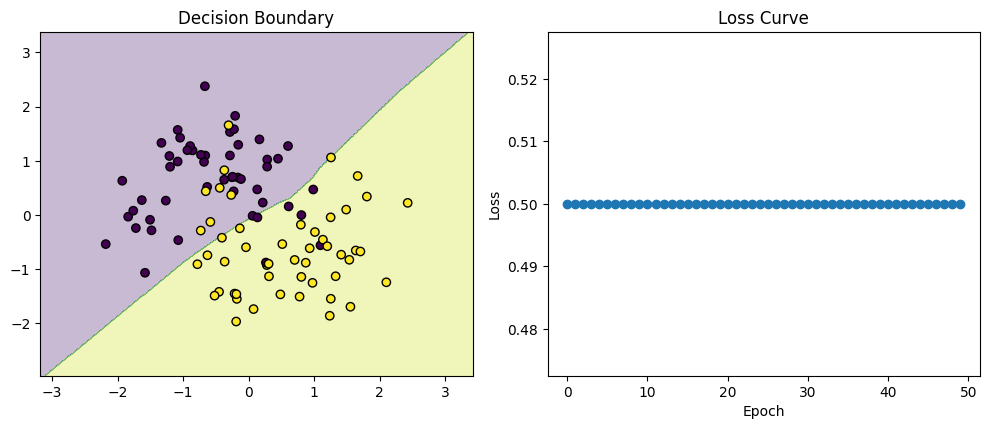

Figure(1000x1200)


In [7]:
#Detect and visualise MLP using auto_visualise from visuallearn
mlp_model = MLP()
mlp_vis = auto_visualize(mlp_model, X=X, y=y)

#Dummy forward pass to initialize hooks
mlp_model.eval()
with torch.no_grad():
    _ = mlp_model(input_tensor)

# --- Optimizer and criterion ---
optimizer = torch.optim.SGD(mlp_model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# --- Animation loop inside notebook ---
for epoch in range(50):
    mlp_model.train()
    optimizer.zero_grad()
    outputs = mlp_model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    y_probs = F.softmax(mlp_model(X_tensor), dim=1).detach().numpy()
    loss_value = log_loss(y, y_probs)
    print(f"Epoch {epoch}, Loss {loss_value:.4f}")

    clear_output(wait=True)
    mlp_vis.update(mlp_model, epoch=epoch, loss=0.5)
    display(mlp_vis.fig)
    plt.show()
    time.sleep(0.1)

In [14]:
#Detect and visualise CNN
cnn_model = CNN()
cnn_vis = auto_visualize(cnn_model, X=None, y=None, input_tensor=cnn_input)
cnn_model.eval()
with torch.no_grad():
    cnn_vis.forward_pass()
cnn_vis.visualize()


[auto_visualize] Detected model type: CNN


NameError: name 'torch' is not defined

In [ ]:
This notebook demonstrates how `visuallearn.auto_visualize()` can:
- Introspect model architecture
- Dynamically choose the right visualization method
- Plot training views with minimal config

Supports MLPs and CNNs today. Coming soon: Transformers, attention maps, etc.